<a href="https://colab.research.google.com/github/MiguelAngeloTr/Datathon/blob/main/Exploring_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import filters
import pydicom
from pydicom.dataset import Dataset, FileDataset
import datetime
import tempfile
import os
import imageio
import seaborn as sns

In [ ]:
# Display and Print Full Functions
def display_full(x, max_row=None):
    pd.set_option('display.max_rows', max_row)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:5,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(f'Shape: {x.shape}')
    display(x.head(max_row))
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

def print_full(x, max_row=None):

    pd.set_option('display.max_rows', max_row)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:5,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(f'Shape: {x.shape}')
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')



In [ ]:
file_dir = "data_Tipo_Tejido_adjusted.csv"
df = pd.read_csv(file_dir)
df.shape
# print_full(df)

(2372, 106)

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)  # ← Muestra todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evita salto de línea

# Leer y mostrar DataFrame
file_dir = "data_Tipo_Tejido_adjusted.csv"
df = pd.read_csv(file_dir)

print(list(df.columns))  # Te da todas las columnas como una lista completa



['diagnostics_Image-original_Mean', 'diagnostics_Image-original_Maximum', 'original_shape2D_Elongation', 'original_shape2D_MajorAxisLength', 'original_shape2D_MaximumDiameter', 'original_shape2D_MeshSurface', 'original_shape2D_MinorAxisLength', 'original_shape2D_Perimeter', 'original_shape2D_PerimeterSurfaceRatio', 'original_shape2D_PixelSurface', 'original_shape2D_Sphericity', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness', 'original_firstorder_TotalEnergy', 'original_firstorder_Uniformity', 'original_firstorder_Varian

In [ ]:
df.iloc[0,-2]

'SIEMENS_Mammomat Inspiration'

In [ ]:
df['Tipo_Tejido'].value_counts()

Tipo_Tejido
B    1308
C     645
A     235
D     184
Name: count, dtype: int64

In [ ]:
df['Mammography_Equipment'].value_counts()

Mammography_Equipment
SIEMENS_Mammomat Inspiration    1939
SIEMENS_MAMMOMAT Revelation      433
Name: count, dtype: int64

In [ ]:
df.describe()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2.372000e+03,2372.000000,2372.000000,2372.000000,2.372000e+03,2372.000000,2372.00000,2372.000000,2.372000e+03,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2.372000e+03,2372.000000,2.372000e+03,2372.000000,2.372000e+03,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.

In [ ]:
numeric_df = df.iloc[:,0:-2]
numeric_df.corr()


,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
diagnostics_Image-original_Mean,1.000000,-0.024121,0.783292,0.819982,0.641400,0.953962,0.941675,0.846067,-0.838494,0.953962,0.507401,0.188223,-0.196207,0.933053,-0.324916,-0.292047,0.253959,0.000584,-0.276923,-0.076170,-0.046851,0.043580,-0.001614,-0.276585,-0.142104,-0.060679,0.933053,0.316455,-0.241994,-0.129504,-0.150383,-0.097761,-0.240845,0.004248,-0.244120,-0.033414,-0.102211,-0.004459,0.079027,0.086556,0.012353,0.056036,0.184859,-0.243630,0.107961,-0.082440,0.208526,-0.254632,-0.030831,-0.247432,-0.082440,-0.325472,-0.240421,0.834643,0.316413,

<Axes: >

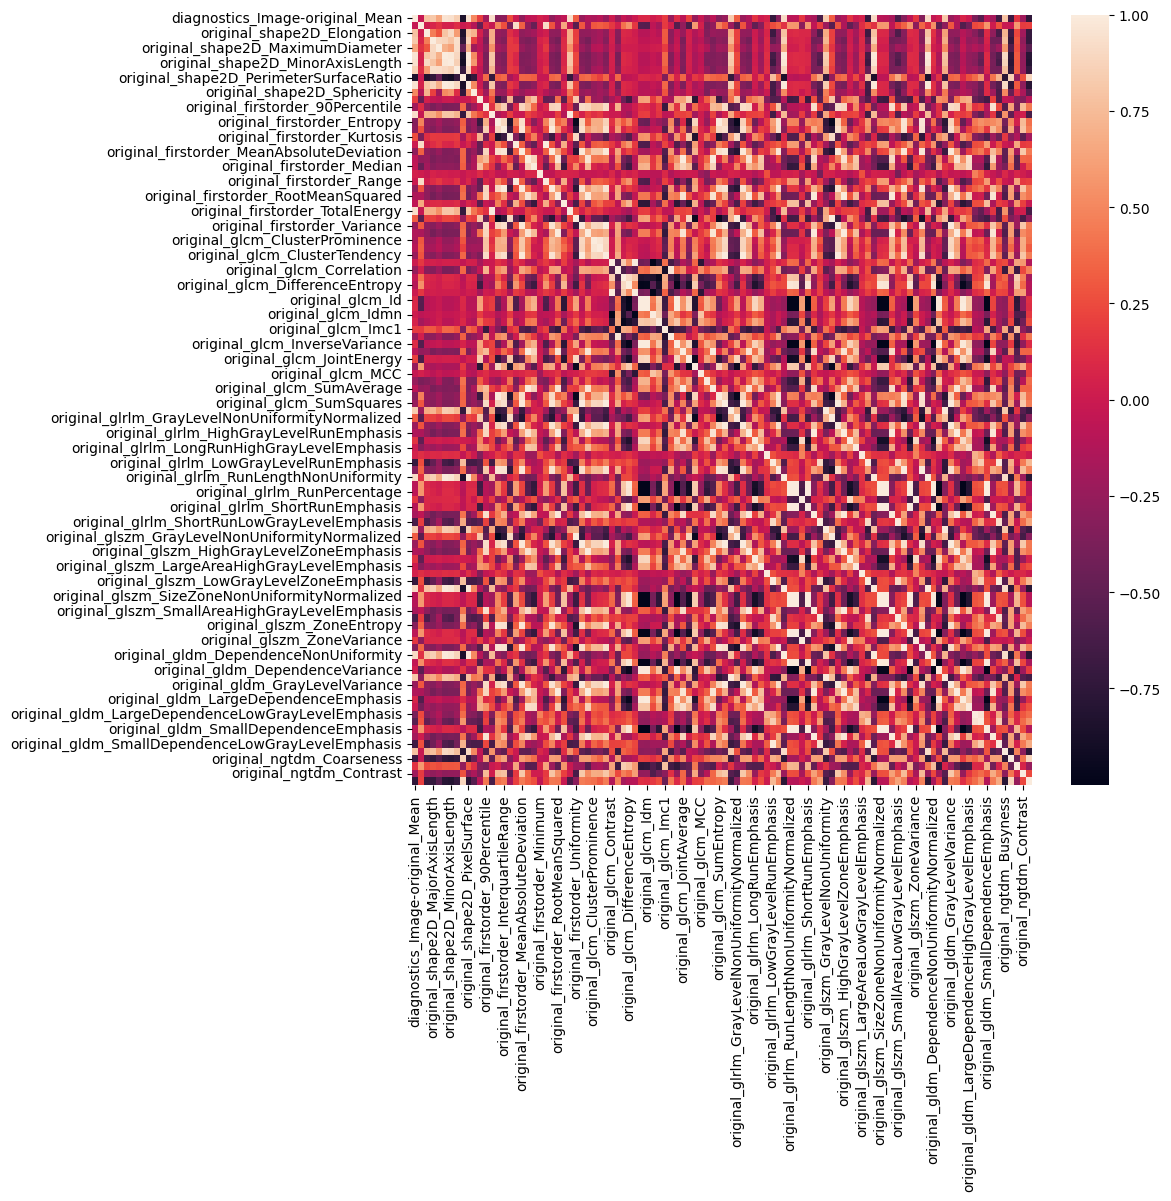

In [ ]:
plt.figure(figsize=(10,10))
df_corr = df[numeric_df.columns].corr()
# display_full(df_corr)
sns.heatmap(df_corr)
# plt.title(f'Corr', fontsize=12, fontweight="bold", x=0.6, y=1.02)

In [ ]:
corr_matrix = numeric_df.corr().abs()

# Quitar duplicados simétricos y autocomparaciones
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Convertir a series y ordenar
sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False)

print(sorted_pairs)
print(f"Número de pares únicos (sin duplicados ni diagonal): {len(sorted_pairs)}")


original_firstorder_TotalEnergy                original_firstorder_Energy                    1.000000
original_glszm_GrayLevelNonUniformity          original_glrlm_GrayLevelNonUniformity         1.000000
original_glszm_SizeZoneNonUniformity           original_glrlm_RunLengthNonUniformity         1.000000
original_glszm_LowGrayLevelZoneEmphasis        original_glrlm_LowGrayLevelRunEmphasis        1.000000
original_glszm_LargeAreaLowGrayLevelEmphasis   original_glrlm_LongRunLowGrayLevelEmphasis    1.000000
                                                                                               ...   
original_glrlm_LongRunHighGrayLevelEmphasis    diagnostics_Image-original_Mean               0.000259
original_glszm_LargeAreaHighGrayLevelEmphasis  diagnostics_Image-original_Mean               0.000259
original_ngtdm_Busyness                        original_firstorder_Maximum                   0.000195
original_gldm_LowGrayLevelEmphasis             original_glrlm_HighGrayLevelRunEmph

In [ ]:
umbral = 0.95
sorted_pairs[sorted_pairs>umbral]

original_firstorder_TotalEnergy               original_firstorder_Energy                    1.000000
original_glszm_GrayLevelNonUniformity         original_glrlm_GrayLevelNonUniformity         1.000000
original_glszm_SizeZoneNonUniformity          original_glrlm_RunLengthNonUniformity         1.000000
original_glszm_LowGrayLevelZoneEmphasis       original_glrlm_LowGrayLevelRunEmphasis        1.000000
original_glszm_LargeAreaLowGrayLevelEmphasis  original_glrlm_LongRunLowGrayLevelEmphasis    1.000000
                                                                                              ...   
original_firstorder_Uniformity                original_firstorder_Entropy                   0.952742
original_glszm_ZoneEntropy                    original_firstorder_InterquartileRange        0.951881
original_glrlm_RunEntropy                     original_firstorder_InterquartileRange        0.951881
original_glrlm_HighGrayLevelRunEmphasis       original_firstorder_Mean                     

In [ ]:
# 1. Extraer solo los pares redundantes
redundant_pairs = sorted_pairs[sorted_pairs > umbral]

# 2. Contar cuántas veces aparece cada feature en esos pares
from collections import Counter

# Cada índice es una tupla: (feature1, feature2)
features_flat = [feature for pair in redundant_pairs.index for feature in pair]

# Contar ocurrencias
feature_counts = Counter(features_flat)

# 3. Mostrar los features más redundantes
most_redundant = feature_counts.most_common(25)  # Top 10
print(f"🔁 Top features with most redundant correlations (ρ > {umbral}):")
for feature, count in most_redundant:
    print(f"{feature}: {count} times")


🔁 Top features with most redundant correlations (ρ > 0.95):
original_glszm_SmallAreaEmphasis: 13 times
original_glrlm_ShortRunEmphasis: 13 times
original_glszm_ZonePercentage: 13 times
original_glrlm_RunPercentage: 13 times
original_glszm_SizeZoneNonUniformityNormalized: 13 times
original_glrlm_RunLengthNonUniformityNormalized: 13 times
original_gldm_LargeDependenceEmphasis: 13 times
original_gldm_SmallDependenceEmphasis: 13 times
original_glcm_Idm: 13 times
original_glcm_Id: 13 times
original_glcm_InverseVariance: 13 times
original_gldm_DependenceNonUniformityNormalized: 13 times
original_gldm_DependenceVariance: 12 times
original_glcm_DifferenceEntropy: 12 times
original_firstorder_RobustMeanAbsoluteDeviation: 11 times
original_firstorder_MeanAbsoluteDeviation: 11 times
original_glszm_HighGrayLevelZoneEmphasis: 10 times
original_glrlm_HighGrayLevelRunEmphasis: 10 times
original_gldm_HighGrayLevelEmphasis: 10 times
original_glcm_Autocorrelation: 10 times
original_firstorder_RootMeanSq

<Axes: >

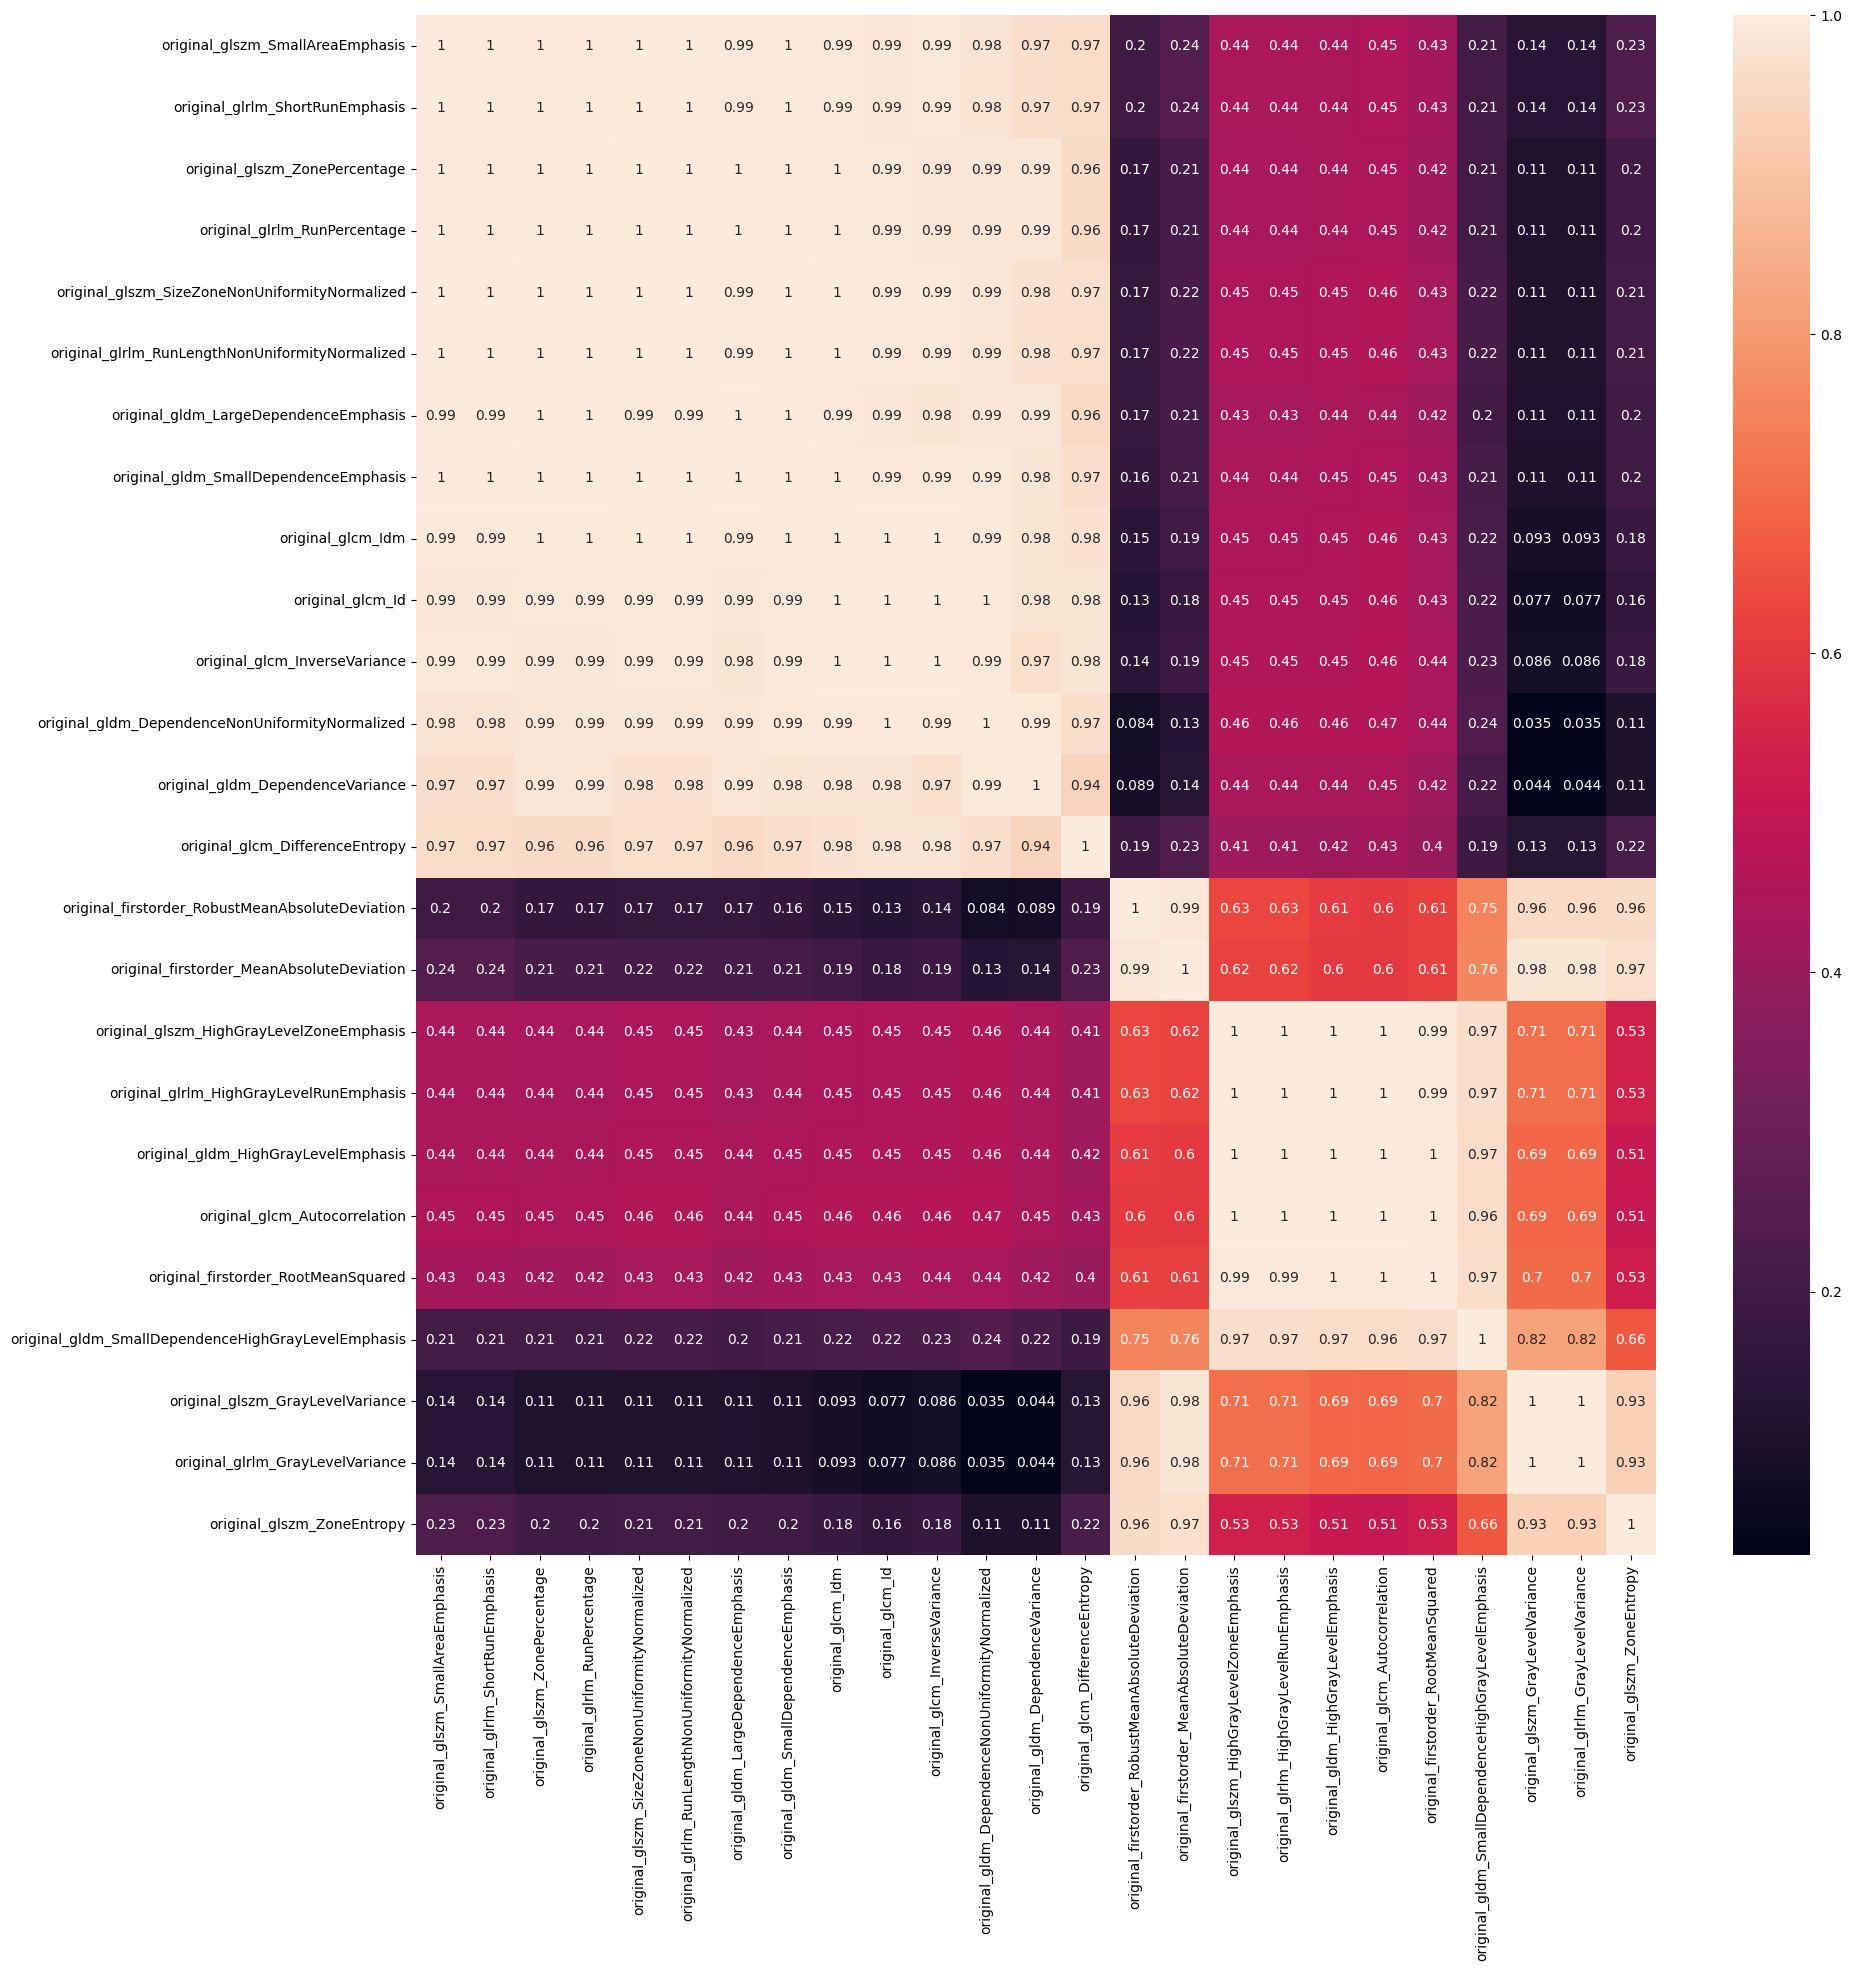

In [ ]:
most_redundant_cols = []
for i in range (len(most_redundant)):
    most_redundant_cols.append(most_redundant[i][0])
plt.figure(figsize=(20,20))
sns.heatmap(df[most_redundant_cols].corr().abs(), annot=True)

In [ ]:
print(df.isnull().sum().sum())

0


In [ ]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"Cantidad de filas duplicadas: {num_duplicados}")

Cantidad de filas duplicadas: 0


In [ ]:
pd.crosstab(df['Mammography_Equipment'], df['Tipo_Tejido'], normalize='index')


Tipo_Tejido,A,B,C,D
Mammography_Equipment,,,,
SIEMENS_MAMMOMAT Revelation,0.108545,0.568129,0.258661,0.064665
SIEMENS_Mammomat Inspiration,0.096957,0.547705,0.274884,0.080454
